#**Ramadhanul Husna [5026211059]**


Note : Jika anda ingin mengubah sentimen ke indonesia Harap ubah bagian :
1. Take Data
ubah bagian lang menjadi "id" agar yang diambil Indonesia
2. Remove Emoji and Stopword
ubah bagian stopword dari "english" ke Indonesia

##Install Module

In [1]:
!pip install google_play_scraper
!pip install textblob
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (15,10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00


<ipython-input-1-9ccb641008d5>:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 8.2 MB/s eta 0:00:00


##Take Data

In [3]:
#Android App Ada – check your health link from Google Play at
#https://play.google.com/store/apps/details?id=com.ada.app&hl=en_US
#Dated 9 September 2024: number of reviews 331K

from google_play_scraper import app, Sort, reviews_all

ada_reviews = reviews_all(
    'com.ada.app',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
#Save the ADA Apps reviews into dataframe
df_adarev = pd.DataFrame(np.array(ada_reviews),columns=['content'])
df_adarev = df_adarev.join(pd.DataFrame(df_adarev.pop('content').tolist()))
df_adarev.to_csv(r'df_ada', index=False)
df_adarev.head()

reviewId       userName  \
0  2d129b2b-a482-4bdf-8687-720988577010  A Google user   
1  2fd9ecba-78bc-4dce-8cc3-1736d02b4e37  A Google user   
2  58b9aa61-eabc-42b8-b170-94d5fe8e850b  A Google user   
3  6c59e041-bc4c-4517-b377-5831cf88ec7f  A Google user   
4  65ee6b8c-5084-40cb-8078-8fa3510c00af  A Google user   

                                                                                                                  userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
1  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
3  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
4  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   

                                                                                                                                                                      content  \
0                                                                                                                    Accurate results compared to lab test findings. Amazing!   
1                                                                                                                                                                Nice doctors   
2                                                                                                               The service is very nice and helpful that help alot of people   
3  It's unbelievable how it reaches to a potential diagnosis. The accuracy is so high that it feels like I am taking to a doctor. The user experience is very rich. Love Ada.   
4                                                                                  excellent diagnosis app I have H.S. I gave them my symptoms and it was right on the money!   

   score  thumbsUpCount reviewCreatedVersion                  at  \
0      5              0               3.59.0 2024-09-08 01:57:49   
1      5              0               3.59.0 2024-09-07 19:31:52   
2      5              0               3.59.0 2024-09-07 18:13:37   
3      5              0               3.59.0 2024-09-07 13:27:30   
4      5              0               3.59.0 2024-09-07 05:39:15   

                                                                                                                                                                                              replyContent  \
0  Hi,\nThank you for your feedback.\nWe're really glad that Ada could help you out.\nIf you have further feedback you'd like to share, we'd love to hear it. Drop us a line at support@ada.com.\nTake ...   
1  Hi,\nThank you for your feedback.\nWe're really glad that Ada could help you out.\nIf you have further feedback you'd like to share, we'd love to hear it. Drop us a line at support@ada.com.\nTake ...   
2  Hi,\nWe appreciate hearing your thoughts.\nIt's always great to hear how Ada has helped our users.\nwe're always looking for ways to improve. We would love to hear more about your experience. Plea...   
3                                                                                                                                                                                                     None   
4                                                                                                                                                                                                     None   

            repliedAt appVersion  
0 2024-09-09 04:48:39     3.59.0  
1 2024-09-09 04:55:09     3.59.0  
2 2024-09-09 05:06:59     3.59.0  
3                 NaT     3.59.0  
4                 NaT     3.59.0

In [5]:
#Information on the table
df_adarev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66041 entries, 0 to 66040
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              66041 non-null  object        
 1   userName              66041 non-null  object        
 2   userImage             66041 non-null  object        
 3   content               66041 non-null  object        
 4   score                 66041 non-null  int64         
 5   thumbsUpCount         66041 non-null  int64         
 6   reviewCreatedVersion  60274 non-null  object        
 7   at                    66041 non-null  datetime64[ns]
 8   replyContent          6389 non-null   object        
 9   repliedAt             6389 non-null   datetime64[ns]
 10  appVersion            60274 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 5.5+ MB


In [6]:
print(df_adarev.reviewCreatedVersion.unique())
print(df_adarev.reviewCreatedVersion.nunique())

['3.59.0' None '3.58.0' '3.22.0' '3.48.0' '3.56.0' '3.57.0' '3.54.0'
 '3.49.1' '3.12.0' '3.55.0' '3.15.1' '3.53.0' '3.52.0' '3.20.0' '3.50.0'
 '3.51.0' '3.47.0' '3.48.1' '2.45.0' '3.46.0' '3.6.1' '3.42.0' '3.43.0'
 '3.13.0' '2.43.0' '3.45.0' '2.23.3' '3.41.0' '3.10.1' '3.21.0' '3.35.0'
 '3.40.0' '2.49.3' '3.2.0' '3.39.0' '3.28.0' '3.34.0' '3.37.0' '3.38.0'
 '2.6.0' '3.30.0' '3.36.0' '3.1.2' '3.27.0' '3.23.0' '3.7.0' '2.36.0'
 '3.33.0' '3.31.0' '3.25.0' '2.27.1' '3.8.0' '2.12.0' '3.19.1' '3.9.0'
 '2.25.0' '3.26.0' '3.24.0' '2.37.2' '2.44.0' '3.29.0' '3.4.0' '3.17.0'
 '2.20.0' '2.49.4' '3.5.0' '2.48.0' '3.14.0' '2.46.4' '2.13.0' '3.4.1'
 '2.39.0' '3.18.0' '3.16.1' '2.30.0' '3.11.0' '2.32.0' '2.5.2' '2.49.1'
 '2.28.0' '3.19.0' '2.10.0' '3.16.0' '3.3.0' '3.0.3' '2.33.0' '2.42.2'
 '2.34.0' '2.22.0' '2.3.0' '2.14.0' '3.10.0' '2.29.0' '2.17.0' '2.15.0'
 '2.19.1' '2.49.2' '3.6.0' '2.8.0' '2.21.0' '3.1.0' '3.0.2' '2.24.0'
 '2.42.0' '2.35.1' '2.49.0' '2.46.3' '2.42.1' '2.41.0' '2.5.1' '2.37.1'
 

##Sentiment Before Preprocessing

In [7]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_adarev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

content  \
0                                                                                                                        Accurate results compared to lab test findings. Amazing!   
1                                                                                                                                                                    Nice doctors   
2                                                                                                                   The service is very nice and helpful that help alot of people   
3      It's unbelievable how it reaches to a potential diagnosis. The accuracy is so high that it feels like I am taking to a doctor. The user experience is very rich. Love Ada.   
4                                                                                      excellent diagnosis app I have H.S. I gave them my symptoms and it was right on the money!   
...                                                                                                                                                                           ...   
66036                                                                                                                  I love it..ive always  wanted an app like this one..thanx😃   
66037                                                                                                                                              it's Awesome I love it so much   
66038                                                                                                                                   It's perfect. It's like a personal doctor   
66039                                                                                                               Its sortet all thung oit and aal my sintoms he helped me with   
66040              AWESOME. It's straight forward on the consultations which is great. Loved it no need of rushing to the hospital because you the app is more like the doctor 🙌🙌   

       score  thumbsUpCount reviewCreatedVersion                  at  \
0          5              0               3.59.0 2024-09-08 01:57:49   
1          5              0               3.59.0 2024-09-07 19:31:52   
2          5              0               3.59.0 2024-09-07 18:13:37   
3          5              0               3.59.0 2024-09-07 13:27:30   
4          5              0               3.59.0 2024-09-07 05:39:15   
...      ...            ...                  ...                 ...   
66036      5              1                2.1.0 2017-03-04 22:30:20   
66037      5              3                2.1.0 2017-03-04 08:53:30   
66038      5              2                2.1.0 2017-03-03 18:00:29   
66039      5              6                2.1.0 2017-03-01 12:58:14   
66040      5             13                2.1.0 2017-02-26 13:29:57   

                                                                                                                                                                                                  replyContent  \
0      Hi,\nThank you for your feedback.\nWe're really glad that Ada could help you out.\nIf you have further feedback you'd like to share, we'd love to hear it. Drop us a line at support@ada.com.\nTake ...   
1      Hi,\nThank you for your feedback.\nWe're really glad that Ada could help you out.\nIf you have further feedback you'd like to share, we'd love to hear it. Drop us a line at support@ada.com.\nTake ...   
2      Hi,\nWe appreciate hearing your thoughts.\nIt's always great to hear how Ada has helped our users.\nwe're always looking for ways to improve. We would love to hear more about your experience. Plea...   
3                                                                                                                                                                                                         None   
4                                                                                 

In [8]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
df_adarev['sentiment_polarity'] = df_adarev['content'].apply(lambda x: TextBlob(x).polarity)
df_adarev['sentiment_subjective'] = df_adarev['content'].apply(lambda x: TextBlob(x).subjectivity)

In [9]:
df_adarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

content  \
0                                                                                                                        Accurate results compared to lab test findings. Amazing!   
1                                                                                                                                                                    Nice doctors   
2                                                                                                                   The service is very nice and helpful that help alot of people   
3      It's unbelievable how it reaches to a potential diagnosis. The accuracy is so high that it feels like I am taking to a doctor. The user experience is very rich. Love Ada.   
4                                                                                      excellent diagnosis app I have H.S. I gave them my symptoms and it was right on the money!   
...                                                                                                                                                                           ...   
66036                                                                                                                  I love it..ive always  wanted an app like this one..thanx😃   
66037                                                                                                                                              it's Awesome I love it so much   
66038                                                                                                                                   It's perfect. It's like a personal doctor   
66039                                                                                                               Its sortet all thung oit and aal my sintoms he helped me with   
66040              AWESOME. It's straight forward on the consultations which is great. Loved it no need of rushing to the hospital because you the app is more like the doctor 🙌🙌   

       score  sentiment_polarity  sentiment_subjective  
0          5            0.575000              0.766667  
1          5            0.600000              1.000000  
2          5            0.780000              1.000000  
3          5            0.179500              0.823000  
4          5            0.678571              0.767857  
...      ...                 ...                   ...  
66036      5            0.500000              0.600000  
66037      5            0.566667              0.600000  
66038      5            0.500000              0.650000  
66039      5            0.000000              0.000000  
66040      5            0.640000              0.690000  

[66041 rows x 4 columns]

In [10]:
#Check number of reviews scores
df_adarev['score'].value_counts()

score
5    50822
4    11429
3     2217
1     1191
2      382
Name: count, dtype: int64

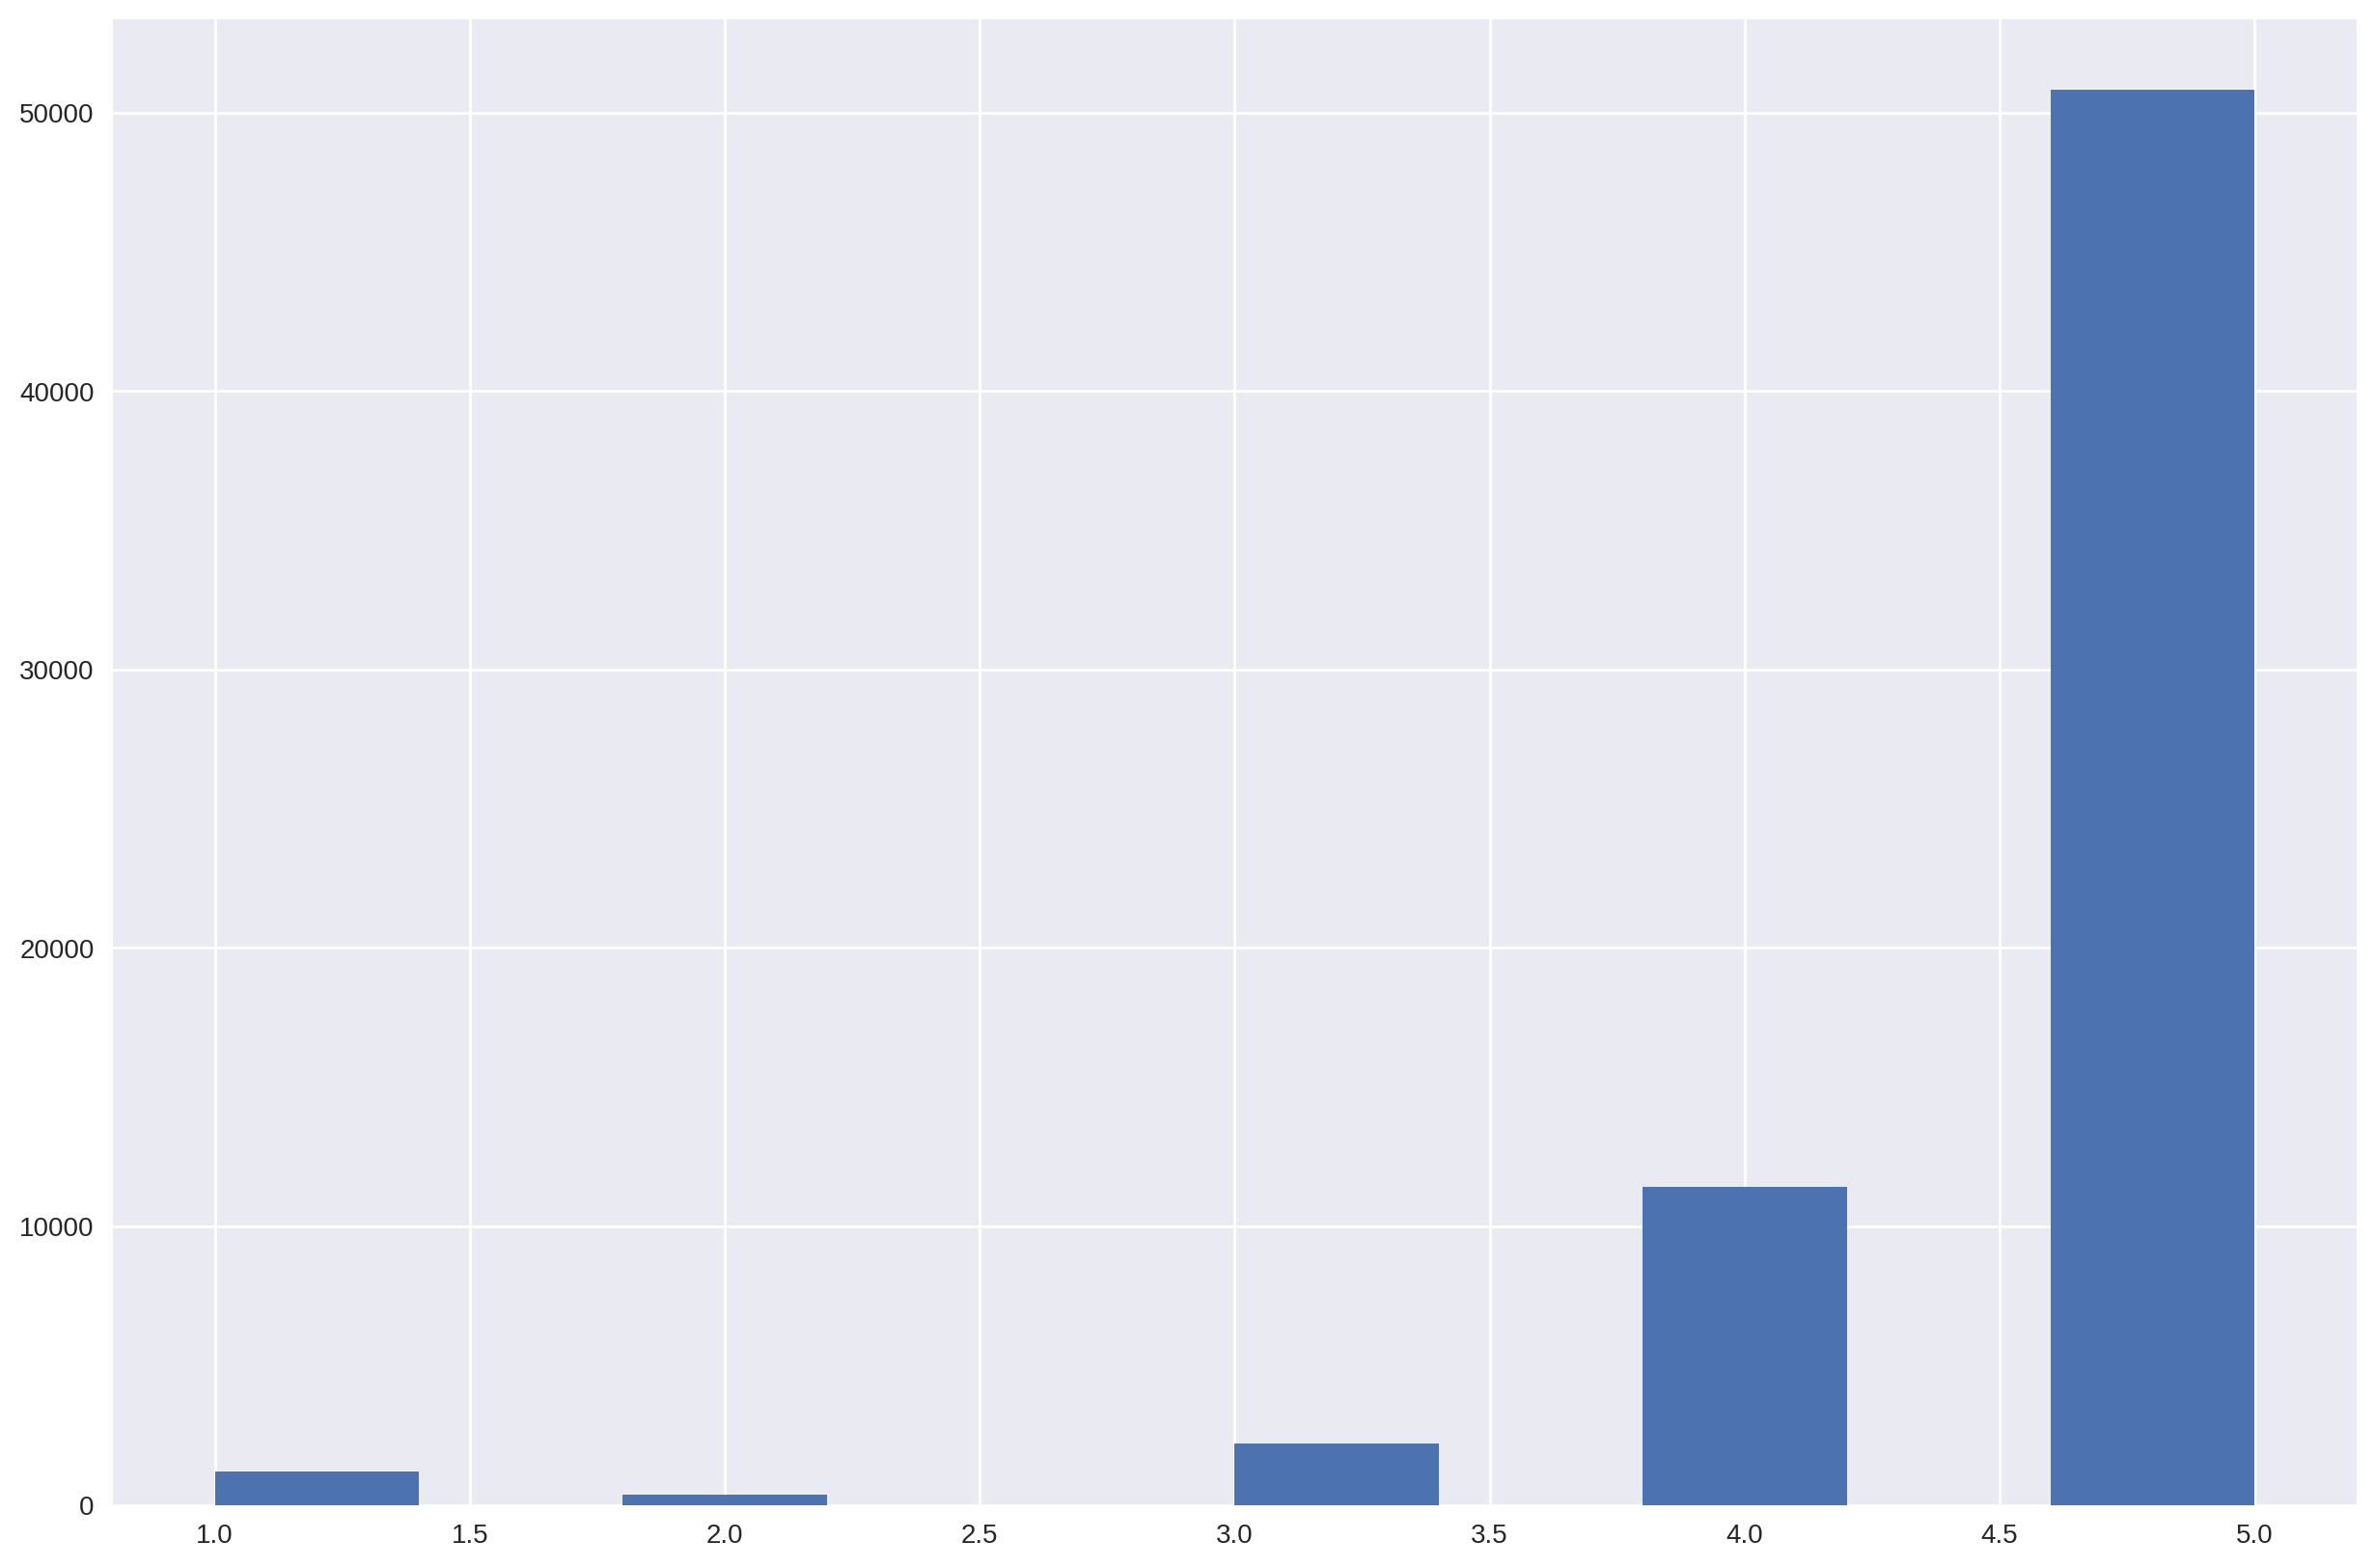

In [11]:
plt.hist(df_adarev['score'])
plt.show()

##Data Preprocessing

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Removing stopwords
#Using nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from string import punctuation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


###Make Lowercase

In [13]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_adarev['content'] = df_adarev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_adarev['content'][200])

Good service


In [14]:
#Lowercase all reviews to see the difference
df_adarev['content']= df_adarev['content'].apply(lambda x: x.lower())
print(df_adarev['content'][200])

good service


In [15]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_adarev['wordCount'] = [len(review.split()) for review in df_adarev['content']]

df_adarev['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_adarev['content']]

df_adarev['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_adarev['content']]

In [16]:
df_adarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

content  \
0                                                                                                                        accurate results compared to lab test findings. amazing!   
1                                                                                                                                                                    nice doctors   
2                                                                                                                   the service is very nice and helpful that help alot of people   
3      it's unbelievable how it reaches to a potential diagnosis. the accuracy is so high that it feels like i am taking to a doctor. the user experience is very rich. love ada.   
4                                                                                      excellent diagnosis app i have h.s. i gave them my symptoms and it was right on the money!   
...                                                                                                                                                                           ...   
66036                                                                                                                  i love it..ive always  wanted an app like this one..thanx😃   
66037                                                                                                                                              it's awesome i love it so much   
66038                                                                                                                                   it's perfect. it's like a personal doctor   
66039                                                                                                               its sortet all thung oit and aal my sintoms he helped me with   
66040              awesome. it's straight forward on the consultations which is great. loved it no need of rushing to the hospital because you the app is more like the doctor 🙌🙌   

       score  sentiment_polarity  sentiment_subjective  wordCount  \
0          5            0.575000              0.766667          8   
1          5            0.600000              1.000000          2   
2          5            0.780000              1.000000         12   
3          5            0.179500              0.823000         32   
4          5            0.678571              0.767857         18   
...      ...                 ...                   ...        ...   
66036      5            0.500000              0.600000         10   
66037      5            0.566667              0.600000          7   
66038      5            0.500000              0.650000          7   
66039      5            0.000000              0.000000         13   
66040      5            0.640000              0.690000         29   

       uppercaseCharCount  specialCharCount  
0                       0                 2  
1                       0                 0  
2                       0                 0  
3                       0                 5  
4                       0                 3  
...                   ...               ...  
66036                   0                 4  
66037                   0                 1  
66038                   0                 3  
66039                   0                 0  
66040                   0                 3  

[66041 rows x 7 columns]

###Check Freq Word

In [17]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

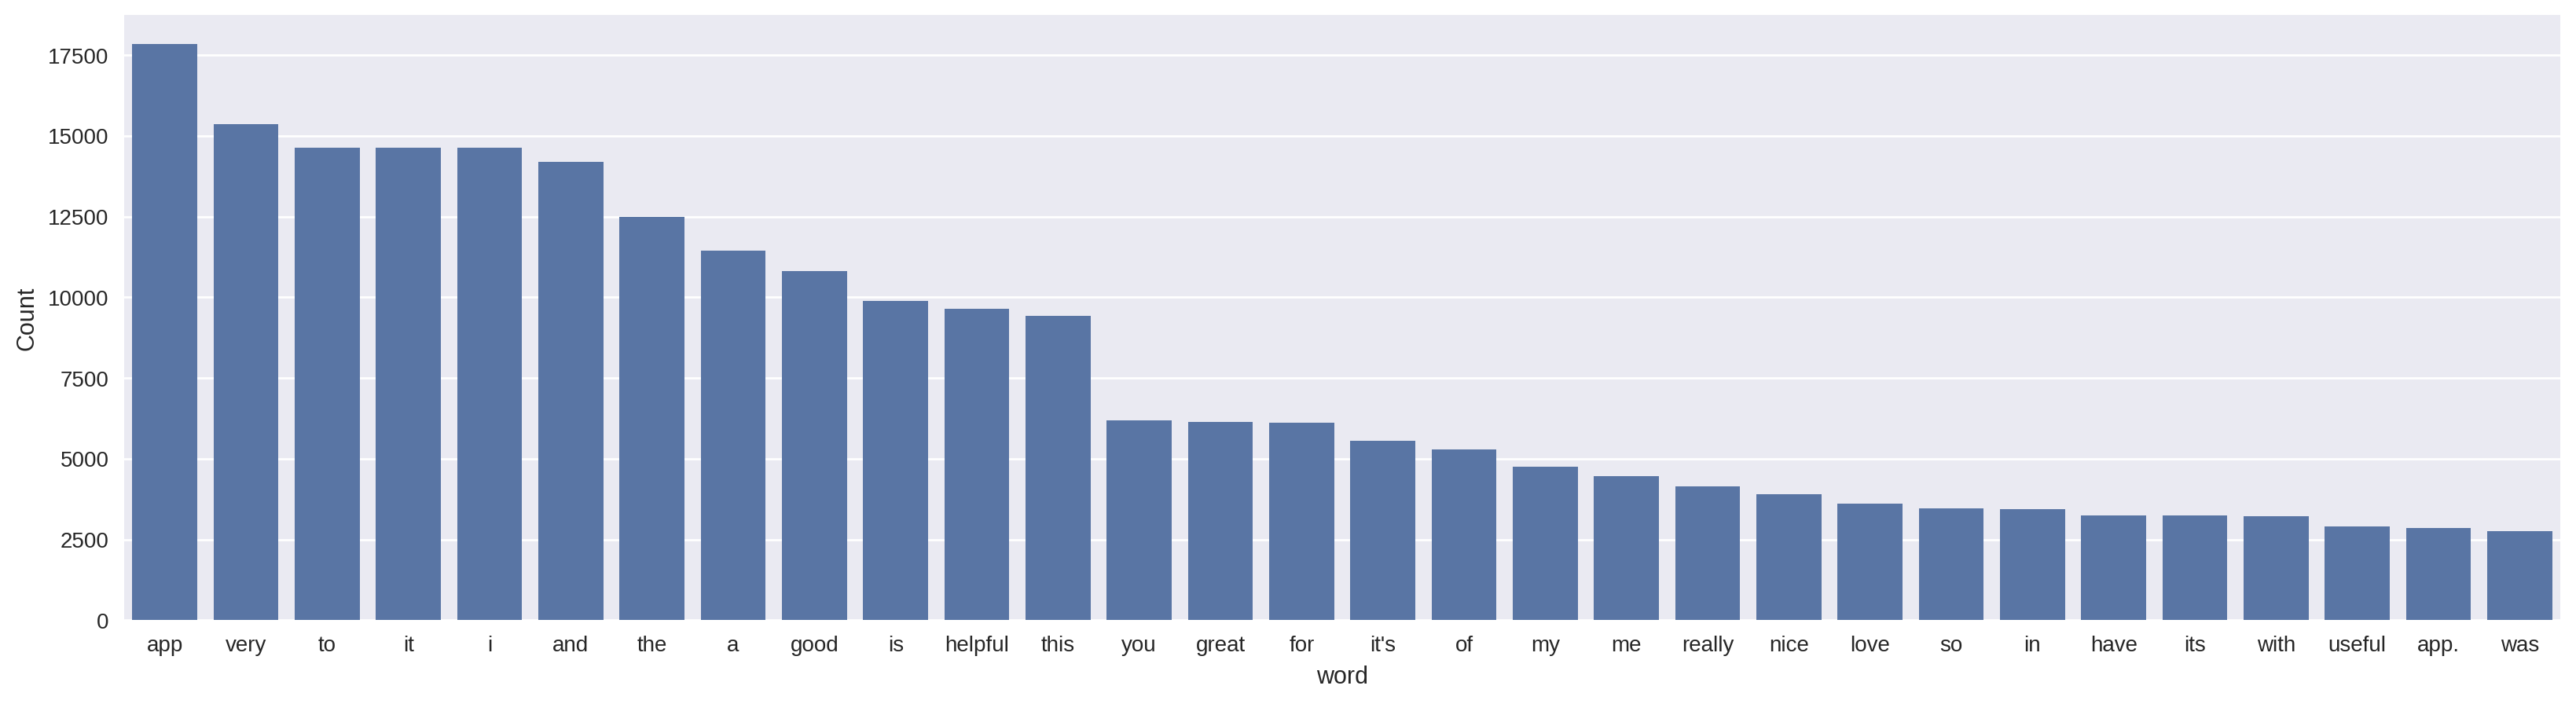

In [ ]:
freq_words(df_adarev['content'])

###Check Special Character

In [18]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(df_adarev.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
    expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return expe.findall(s)
    return expe.sub(r'',s)

for y in df_adarev['content']:
    #print(str(extract_emojis(y)))
    extracted_emojis.append(str(extract_emojis(y)))

print(extracted_emojis)

True
['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['👍']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😘', '🌻']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🔥']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['👍']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['👍']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['💯', '💯', '💯', '💯']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['👏']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]',

In [19]:
df_adarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

content  \
0                                                                                                                        accurate results compared to lab test findings. amazing!   
1                                                                                                                                                                    nice doctors   
2                                                                                                                   the service is very nice and helpful that help alot of people   
3      it's unbelievable how it reaches to a potential diagnosis. the accuracy is so high that it feels like i am taking to a doctor. the user experience is very rich. love ada.   
4                                                                                      excellent diagnosis app i have h.s. i gave them my symptoms and it was right on the money!   
...                                                                                                                                                                           ...   
66036                                                                                                                  i love it..ive always  wanted an app like this one..thanx😃   
66037                                                                                                                                              it's awesome i love it so much   
66038                                                                                                                                   it's perfect. it's like a personal doctor   
66039                                                                                                               its sortet all thung oit and aal my sintoms he helped me with   
66040              awesome. it's straight forward on the consultations which is great. loved it no need of rushing to the hospital because you the app is more like the doctor 🙌🙌   

       score  sentiment_polarity  sentiment_subjective  wordCount  \
0          5            0.575000              0.766667          8   
1          5            0.600000              1.000000          2   
2          5            0.780000              1.000000         12   
3          5            0.179500              0.823000         32   
4          5            0.678571              0.767857         18   
...      ...                 ...                   ...        ...   
66036      5            0.500000              0.600000         10   
66037      5            0.566667              0.600000          7   
66038      5            0.500000              0.650000          7   
66039      5            0.000000              0.000000         13   
66040      5            0.640000              0.690000         29   

       uppercaseCharCount  specialCharCount  
0                       0                 2  
1                       0                 0  
2                       0                 0  
3                       0                 5  
4                       0                 3  
...                   ...               ...  
66036                   0                 4  
66037                   0                 1  
66038                   0                 3  
66039                   0                 0  
66040                   0                 3  

[66041 rows x 7 columns]

In [20]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_adarev['sentiment_rating'] = df_adarev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [21]:
df_adarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

content  \
0                                                                                                                        accurate results compared to lab test findings. amazing!   
1                                                                                                                                                                    nice doctors   
2                                                                                                                   the service is very nice and helpful that help alot of people   
3      it's unbelievable how it reaches to a potential diagnosis. the accuracy is so high that it feels like i am taking to a doctor. the user experience is very rich. love ada.   
4                                                                                      excellent diagnosis app i have h.s. i gave them my symptoms and it was right on the money!   
...                                                                                                                                                                           ...   
66036                                                                                                                  i love it..ive always  wanted an app like this one..thanx😃   
66037                                                                                                                                              it's awesome i love it so much   
66038                                                                                                                                   it's perfect. it's like a personal doctor   
66039                                                                                                               its sortet all thung oit and aal my sintoms he helped me with   
66040              awesome. it's straight forward on the consultations which is great. loved it no need of rushing to the hospital because you the app is more like the doctor 🙌🙌   

       score  sentiment_polarity  sentiment_subjective sentiment_rating  
0          5            0.575000              0.766667         Positive  
1          5            0.600000              1.000000         Positive  
2          5            0.780000              1.000000         Positive  
3          5            0.179500              0.823000         Positive  
4          5            0.678571              0.767857         Positive  
...      ...                 ...                   ...              ...  
66036      5            0.500000              0.600000         Positive  
66037      5            0.566667              0.600000         Positive  
66038      5            0.500000              0.650000         Positive  
66039      5            0.000000              0.000000         Positive  
66040      5            0.640000              0.690000         Positive  

[66041 rows x 5 columns]

###Sentimen Polarity Before Stopword

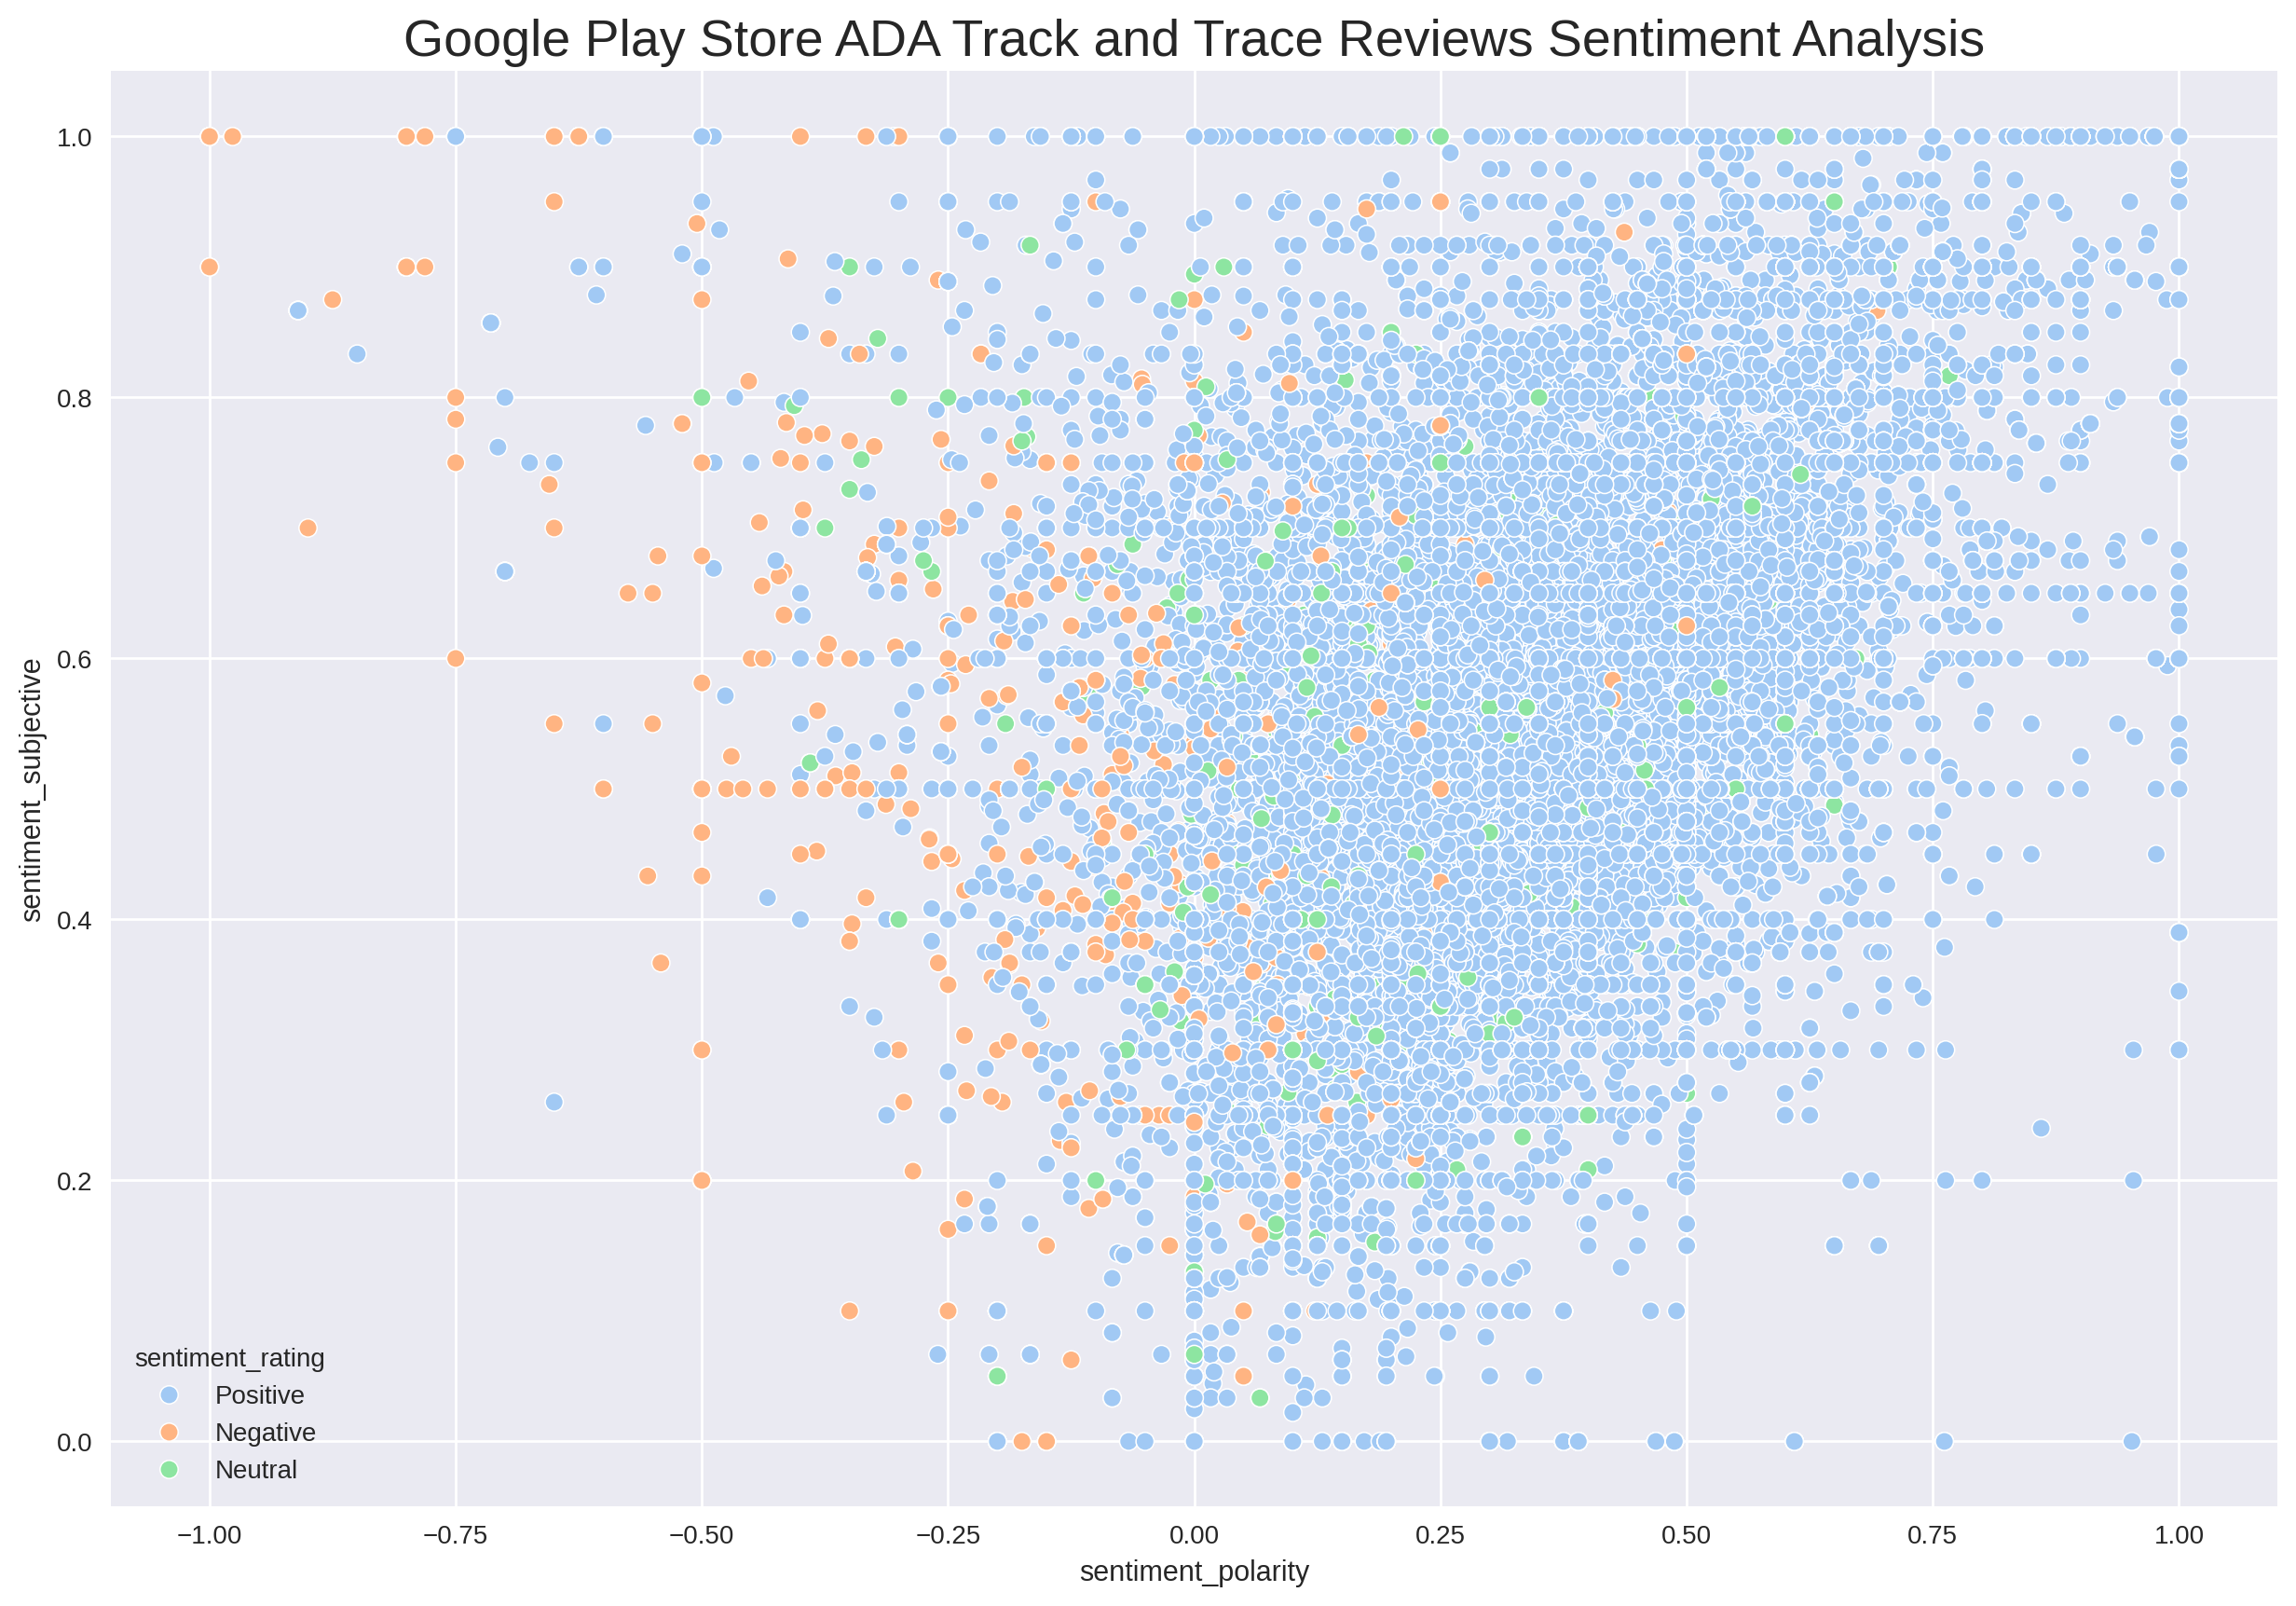

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Gunakan argumen keyword 'x' dan 'y' dengan benar
sns.scatterplot(x=df_adarev['sentiment_polarity'],
                y=df_adarev['sentiment_subjective'],
                hue=df_adarev['sentiment_rating'],
                edgecolor='white',
                palette="pastel")

plt.title("Google Play Store ADA Track and Trace Reviews Sentiment Analysis", fontsize=20)
plt.show()


##Remove Emoji and Stopword

In [23]:
# Fungsi untuk menghapus emoji
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

# Terapkan fungsi penghapusan emoji
df_adarev['content'] = df_adarev['content'].apply(remove_emoji)

# Simpan DataFrame dengan emoji yang sudah dihapus
df_adarev.to_csv(r'df_ada_emoji_removed', index=False)

In [24]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english') + ["'","someone","still","would","need"]
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(len(stop))

184


In [25]:
df_adarev_stopwords = df_adarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

In [26]:
# stopwords
df_adarev_stopwords['tweet_with_stopwords'] = df_adarev_stopwords['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df_adarev_stopwords)

                                                                                                                                                                          content  \
0                                                                                                                        accurate results compared to lab test findings. amazing!   
1                                                                                                                                                                    nice doctors   
2                                                                                                                   the service is very nice and helpful that help alot of people   
3      it's unbelievable how it reaches to a potential diagnosis. the accuracy is so high that it feels like i am taking to a doctor. the user experience is very rich. love ada.   
4                                                                                      excellen

In [29]:
pat = r'\b(?:{})\b|\.'.format('|'.join(stop))
df_adarev_stopwords['tweet_with_stopwords'] = df_adarev_stopwords['content'].str.replace(pat, '', regex=True)
df_adarev_stopwords['tweet_with_stopwords'] = df_adarev_stopwords['tweet_with_stopwords'].str.replace(r'\s+', ' ', regex=True)


In [30]:
#Save into csv after applying stopwords
df_adarev_stopwords.to_csv(r'df_ada_after', index = False)

In [31]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_adarev_stopwords['wordCount'] = [len(review.split()) for review in df_adarev_stopwords['content']]
df_adarev_stopwords['wordCount_after_stopwords'] = [len(review.split()) for review in df_adarev_stopwords['tweet_with_stopwords']]


In [32]:
df_adarev_stopwords.loc[:,["content","score","sentiment_polarity", "sentiment_rating","wordCount","tweet_with_stopwords", "wordCount_after_stopwords"]]

content  \
0                                                                                                                        accurate results compared to lab test findings. amazing!   
1                                                                                                                                                                    nice doctors   
2                                                                                                                   the service is very nice and helpful that help alot of people   
3      it's unbelievable how it reaches to a potential diagnosis. the accuracy is so high that it feels like i am taking to a doctor. the user experience is very rich. love ada.   
4                                                                                      excellent diagnosis app i have h.s. i gave them my symptoms and it was right on the money!   
...                                                                                                                                                                           ...   
66036                                                                                                                   i love it..ive always  wanted an app like this one..thanx   
66037                                                                                                                                              it's awesome i love it so much   
66038                                                                                                                                   it's perfect. it's like a personal doctor   
66039                                                                                                               its sortet all thung oit and aal my sintoms he helped me with   
66040                awesome. it's straight forward on the consultations which is great. loved it no need of rushing to the hospital because you the app is more like the doctor    

       score  sentiment_polarity sentiment_rating  wordCount  \
0          5            0.575000         Positive          8   
1          5            0.600000         Positive          2   
2          5            0.780000         Positive         12   
3          5            0.179500         Positive         32   
4          5            0.678571         Positive         18   
...      ...                 ...              ...        ...   
66036      5            0.500000         Positive         10   
66037      5            0.566667         Positive          7   
66038      5            0.500000         Positive          7   
66039      5            0.000000         Positive         13   
66040      5            0.640000         Positive         28   

                                                                                                 tweet_with_stopwords  \
0                                                                accurate results compared lab test findings amazing!   
1                                                                                                        nice doctors   
2                                                                               service nice helpful help alot people   
3       unbelievable reaches potential diagnosis accuracy high feels like taking doctor user experience rich love ada   
4                                                                excellent diagnosis app h gave symptoms right money!   
...                                                                                                               ...   
66036                                                                        love ive always wanted app like onethanx   
66037                                                                                               awesome love much   
66038                                                                                    perfect like personal doctor   
66039             

In [33]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

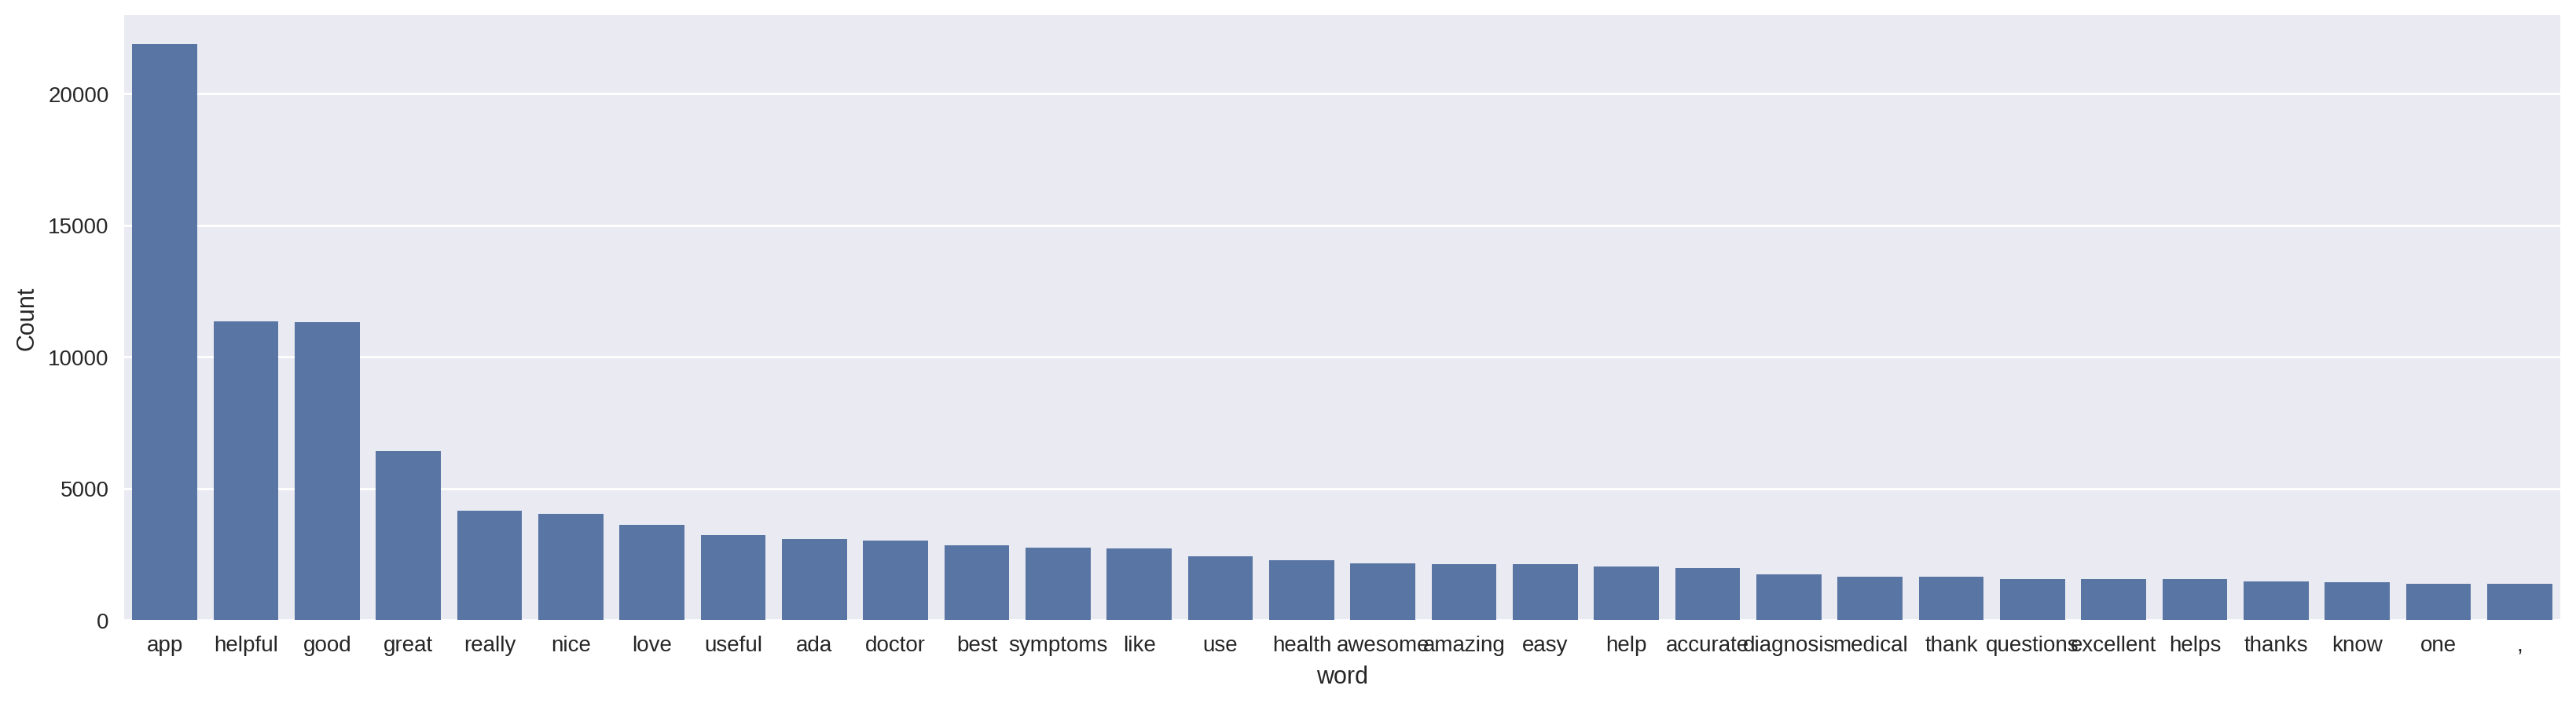

In [34]:
freq_words(df_adarev_stopwords['tweet_with_stopwords'])

##Stemming

In [35]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Inisialisasi PorterStemmer
st = PorterStemmer()

def stemming(text):
    return ' '.join([st.stem(word) for word in text.split()])

# Contoh DataFrame (asumsi df_adarev_stopwords sudah ada)
# df_adarev_stopwords = pd.DataFrame({
#     'tweet_without_stopwords': ["running runs runners run", "eating eats eaten eat"]
# })

# Terapkan stemming
df_adarev_stopwords['tweet_stemmed'] = df_adarev_stopwords['tweet_with_stopwords'].apply(stemming)

# Tampilkan contoh sebelum dan sesudah stemming
for i in [0]:  # Ganti 200 dengan index yang Anda inginkan
    original_text = df_adarev_stopwords['tweet_with_stopwords'].iloc[i]
    stemmed_text = df_adarev_stopwords['tweet_stemmed'].iloc[i]
    print(f"Original: {original_text}")
    print(f"Stemmed:  {stemmed_text}")
    print()


Original: accurate results compared lab test findings amazing!
Stemmed:  accur result compar lab test find amazing!



##Result

In [36]:
df_adarev_stopwords.loc[:,["content","score","sentiment_rating","wordCount","tweet_with_stopwords", "wordCount_after_stopwords","tweet_stemmed"]]

content  \
0                                                                                                                        accurate results compared to lab test findings. amazing!   
1                                                                                                                                                                    nice doctors   
2                                                                                                                   the service is very nice and helpful that help alot of people   
3      it's unbelievable how it reaches to a potential diagnosis. the accuracy is so high that it feels like i am taking to a doctor. the user experience is very rich. love ada.   
4                                                                                      excellent diagnosis app i have h.s. i gave them my symptoms and it was right on the money!   
...                                                                                                                                                                           ...   
66036                                                                                                                   i love it..ive always  wanted an app like this one..thanx   
66037                                                                                                                                              it's awesome i love it so much   
66038                                                                                                                                   it's perfect. it's like a personal doctor   
66039                                                                                                               its sortet all thung oit and aal my sintoms he helped me with   
66040                awesome. it's straight forward on the consultations which is great. loved it no need of rushing to the hospital because you the app is more like the doctor    

       score sentiment_rating  wordCount  \
0          5         Positive          8   
1          5         Positive          2   
2          5         Positive         12   
3          5         Positive         32   
4          5         Positive         18   
...      ...              ...        ...   
66036      5         Positive         10   
66037      5         Positive          7   
66038      5         Positive          7   
66039      5         Positive         13   
66040      5         Positive         28   

                                                                                                 tweet_with_stopwords  \
0                                                                accurate results compared lab test findings amazing!   
1                                                                                                        nice doctors   
2                                                                               service nice helpful help alot people   
3       unbelievable reaches potential diagnosis accuracy high feels like taking doctor user experience rich love ada   
4                                                                excellent diagnosis app h gave symptoms right money!   
...                                                                                                               ...   
66036                                                                        love ive always wanted app like onethanx   
66037                                                                                               awesome love much   
66038                                                                                    perfect like personal doctor   
66039                                                                            sortet thung oit aal sintoms helped    
66040                            awesome straight forward consultations great loved rushing hospital app like doctor    

       wordCoun

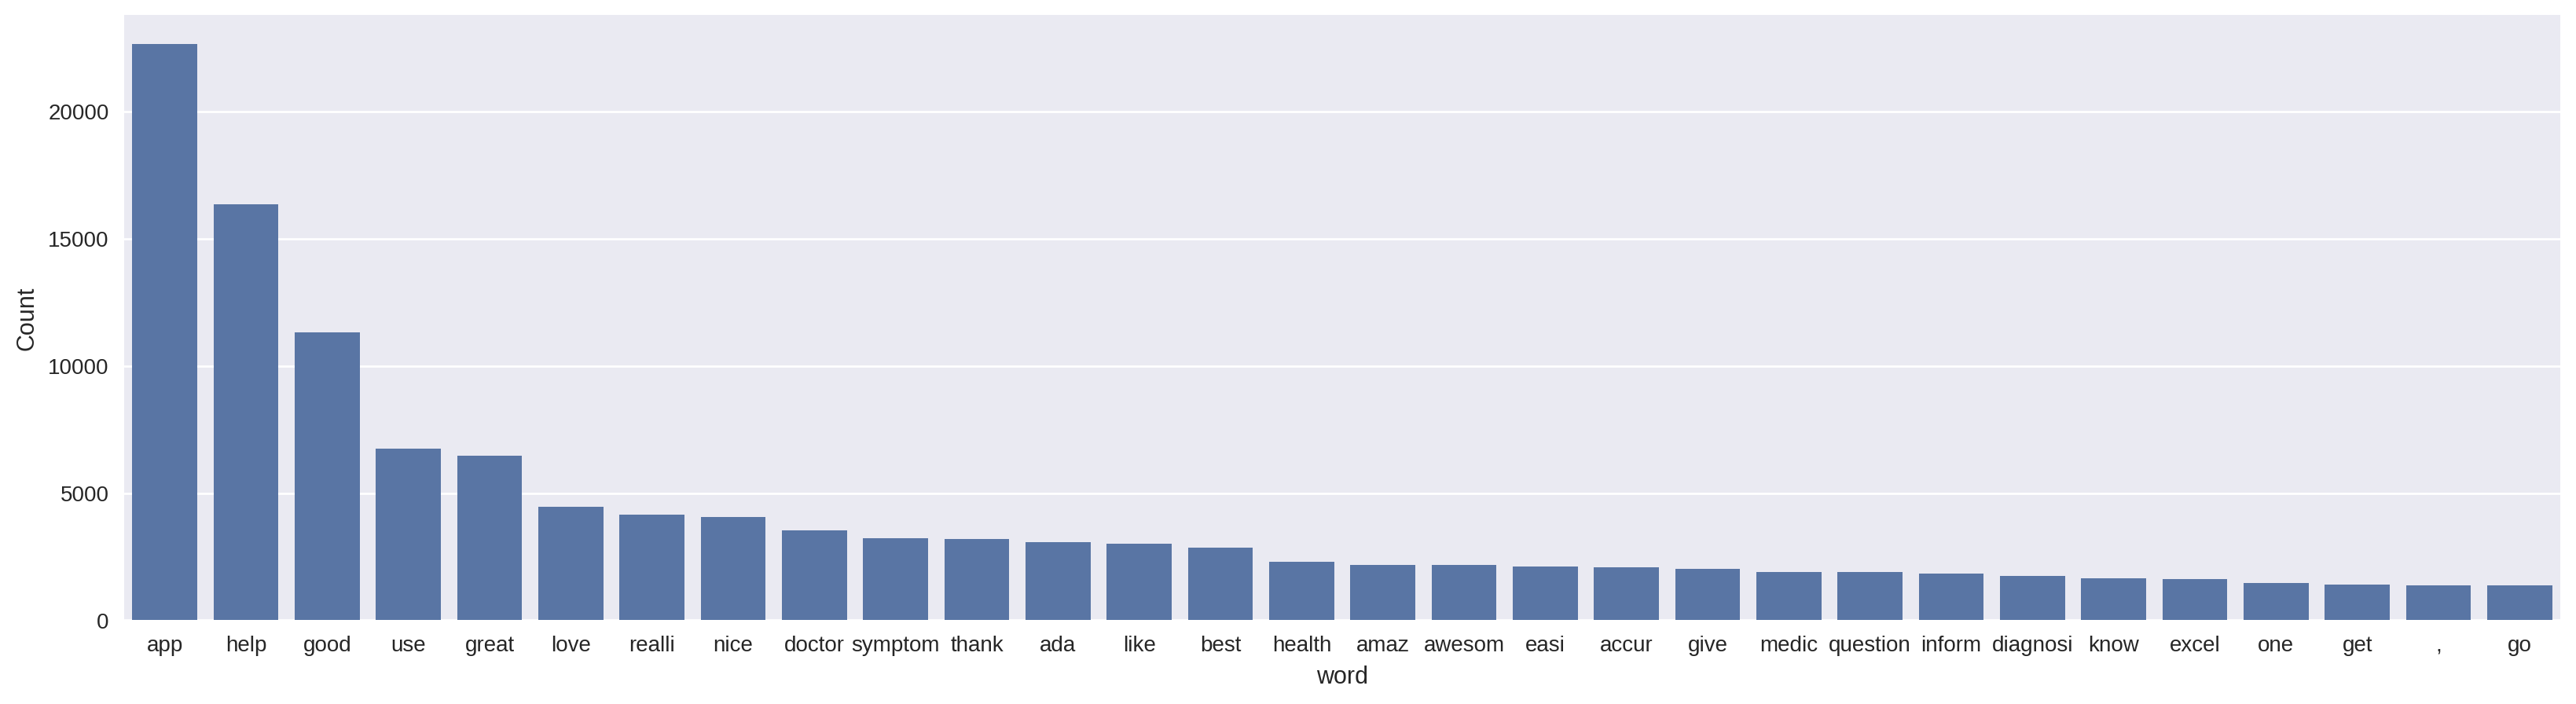

In [37]:
freq_words(df_adarev_stopwords['tweet_stemmed'])

###Rating

In [38]:
#Check number of reviews scores
df_adarev_stopwords['sentiment_rating'].value_counts()

sentiment_rating
Positive    62251
Neutral      2217
Negative     1573
Name: count, dtype: int64

###Sentimen Analysis

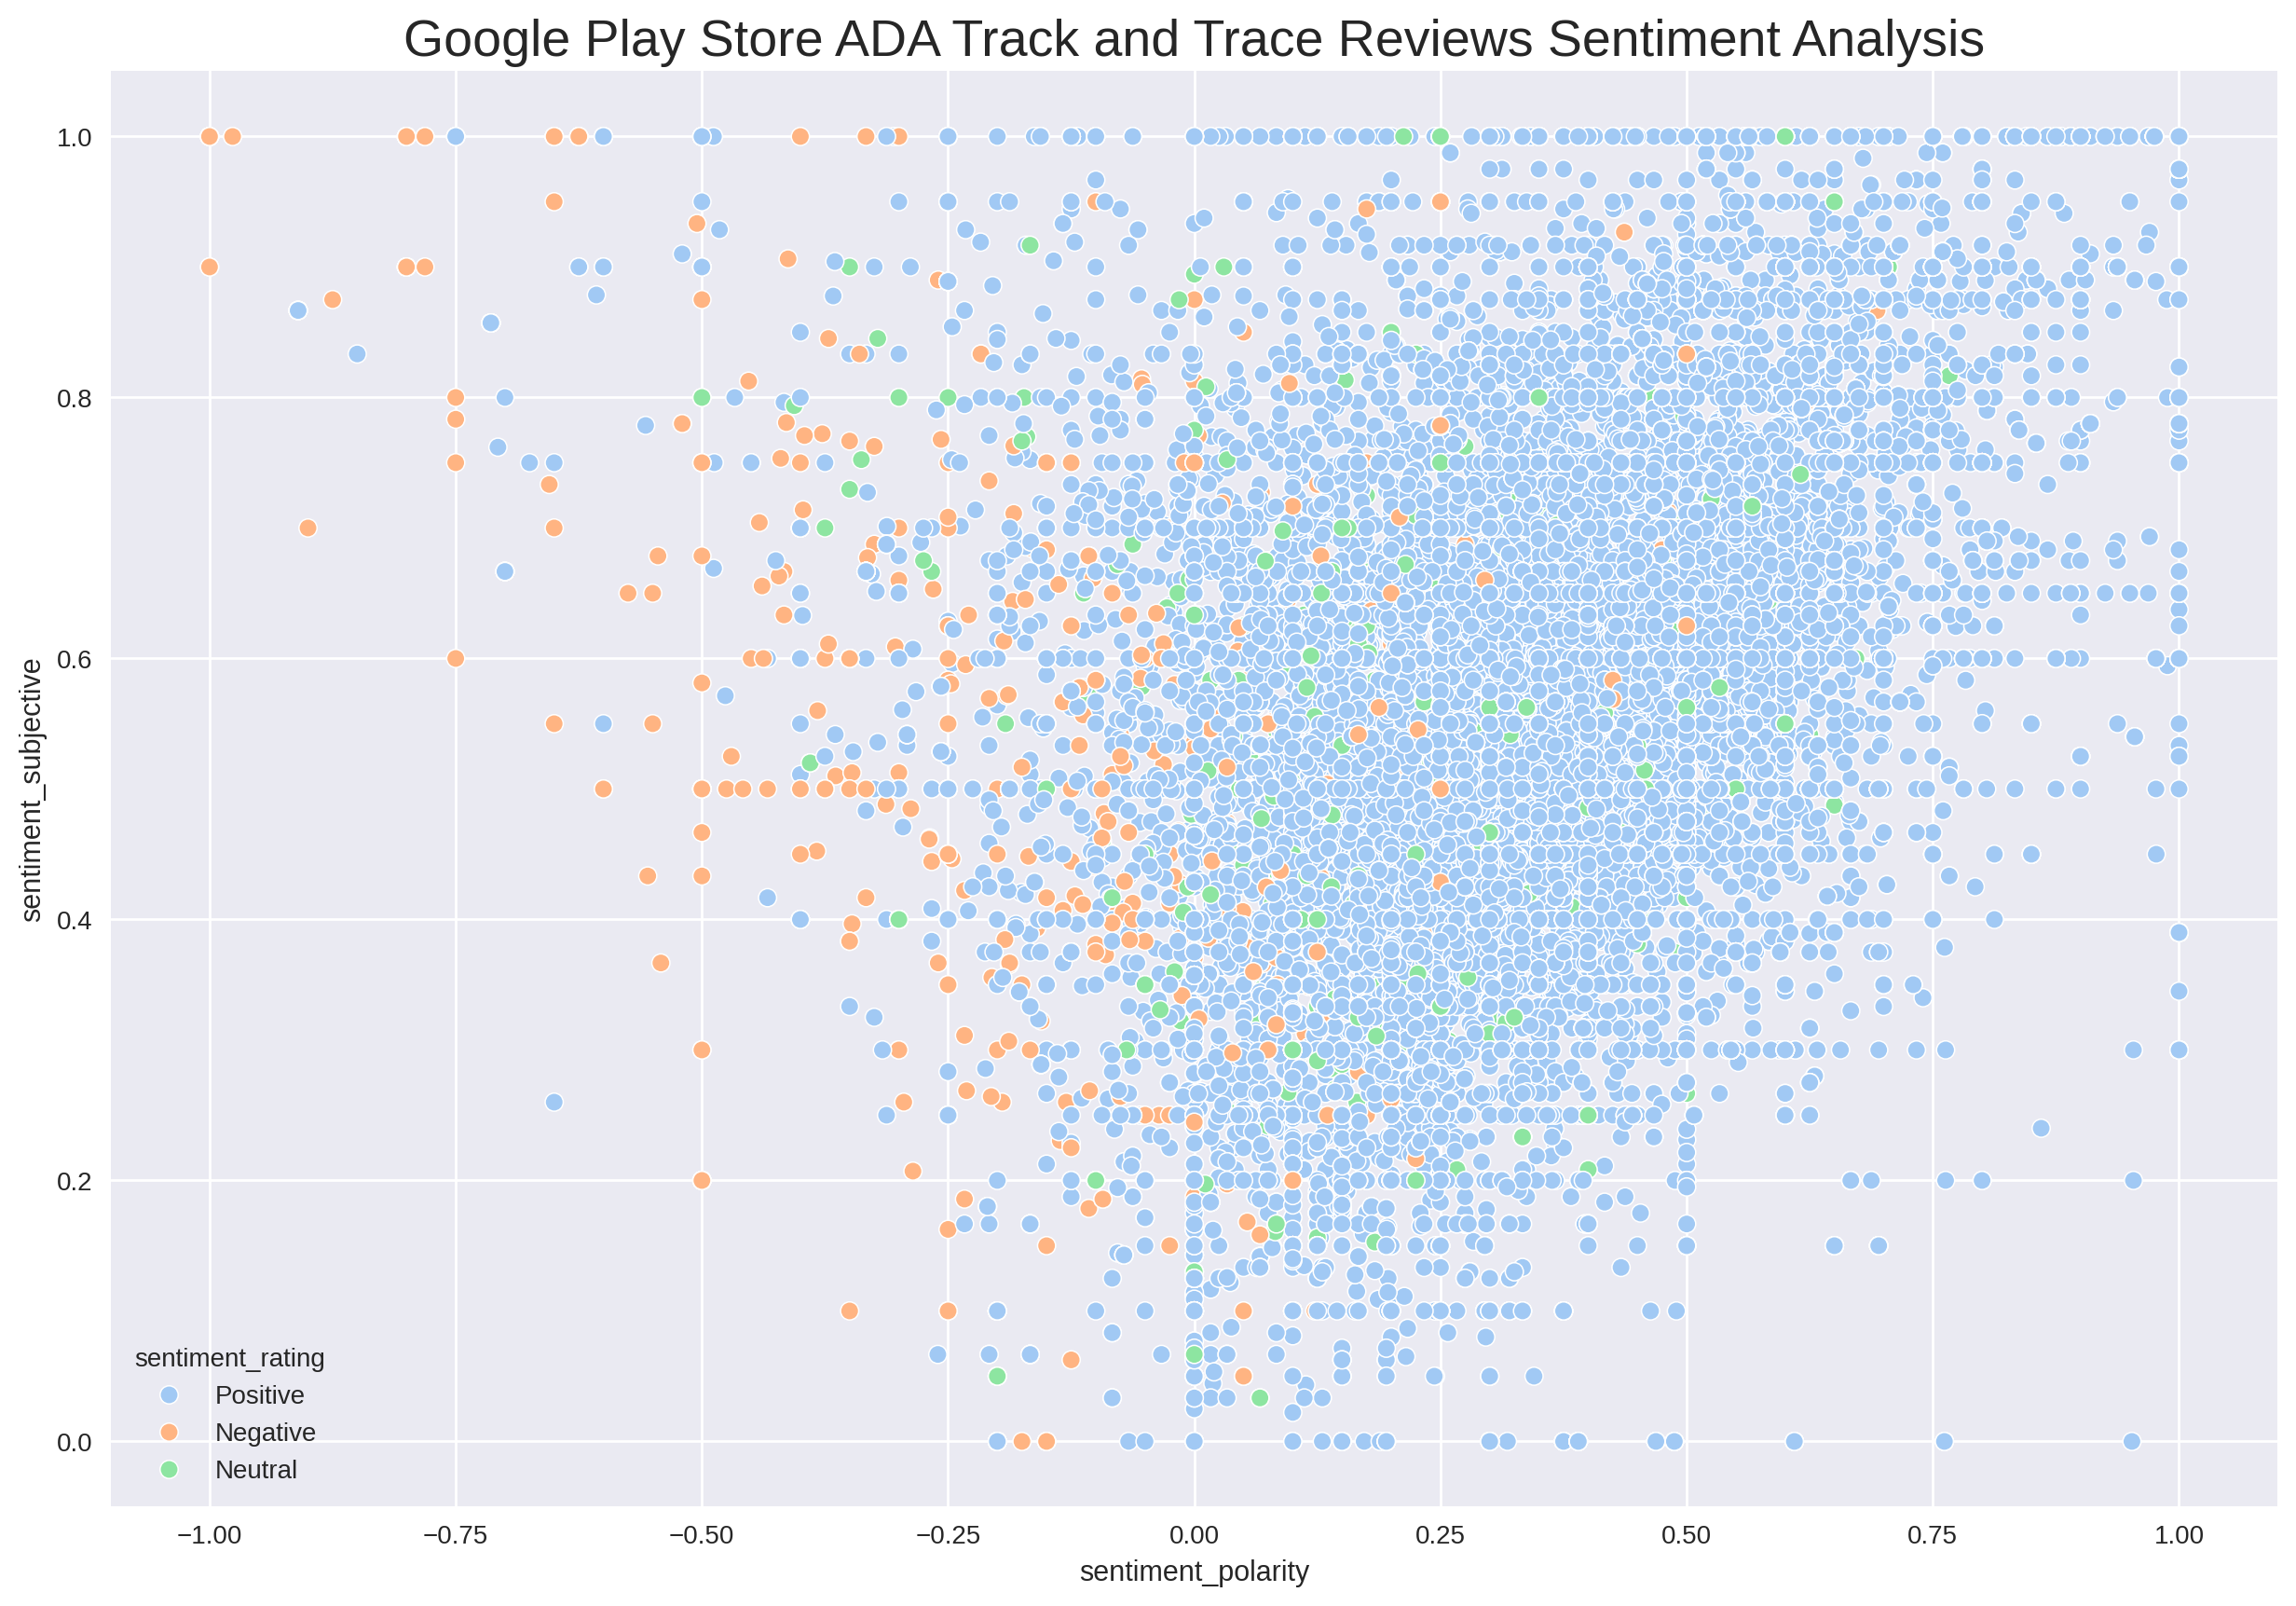

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Gunakan argumen keyword 'x' dan 'y' dengan benar
sns.scatterplot(x=df_adarev_stopwords['sentiment_polarity'],
                y=df_adarev_stopwords['sentiment_subjective'],
                hue=df_adarev_stopwords['sentiment_rating'],
                edgecolor='white',
                palette="pastel")

plt.title("Google Play Store ADA Track and Trace Reviews Sentiment Analysis", fontsize=20)
plt.show()


###Score Freq

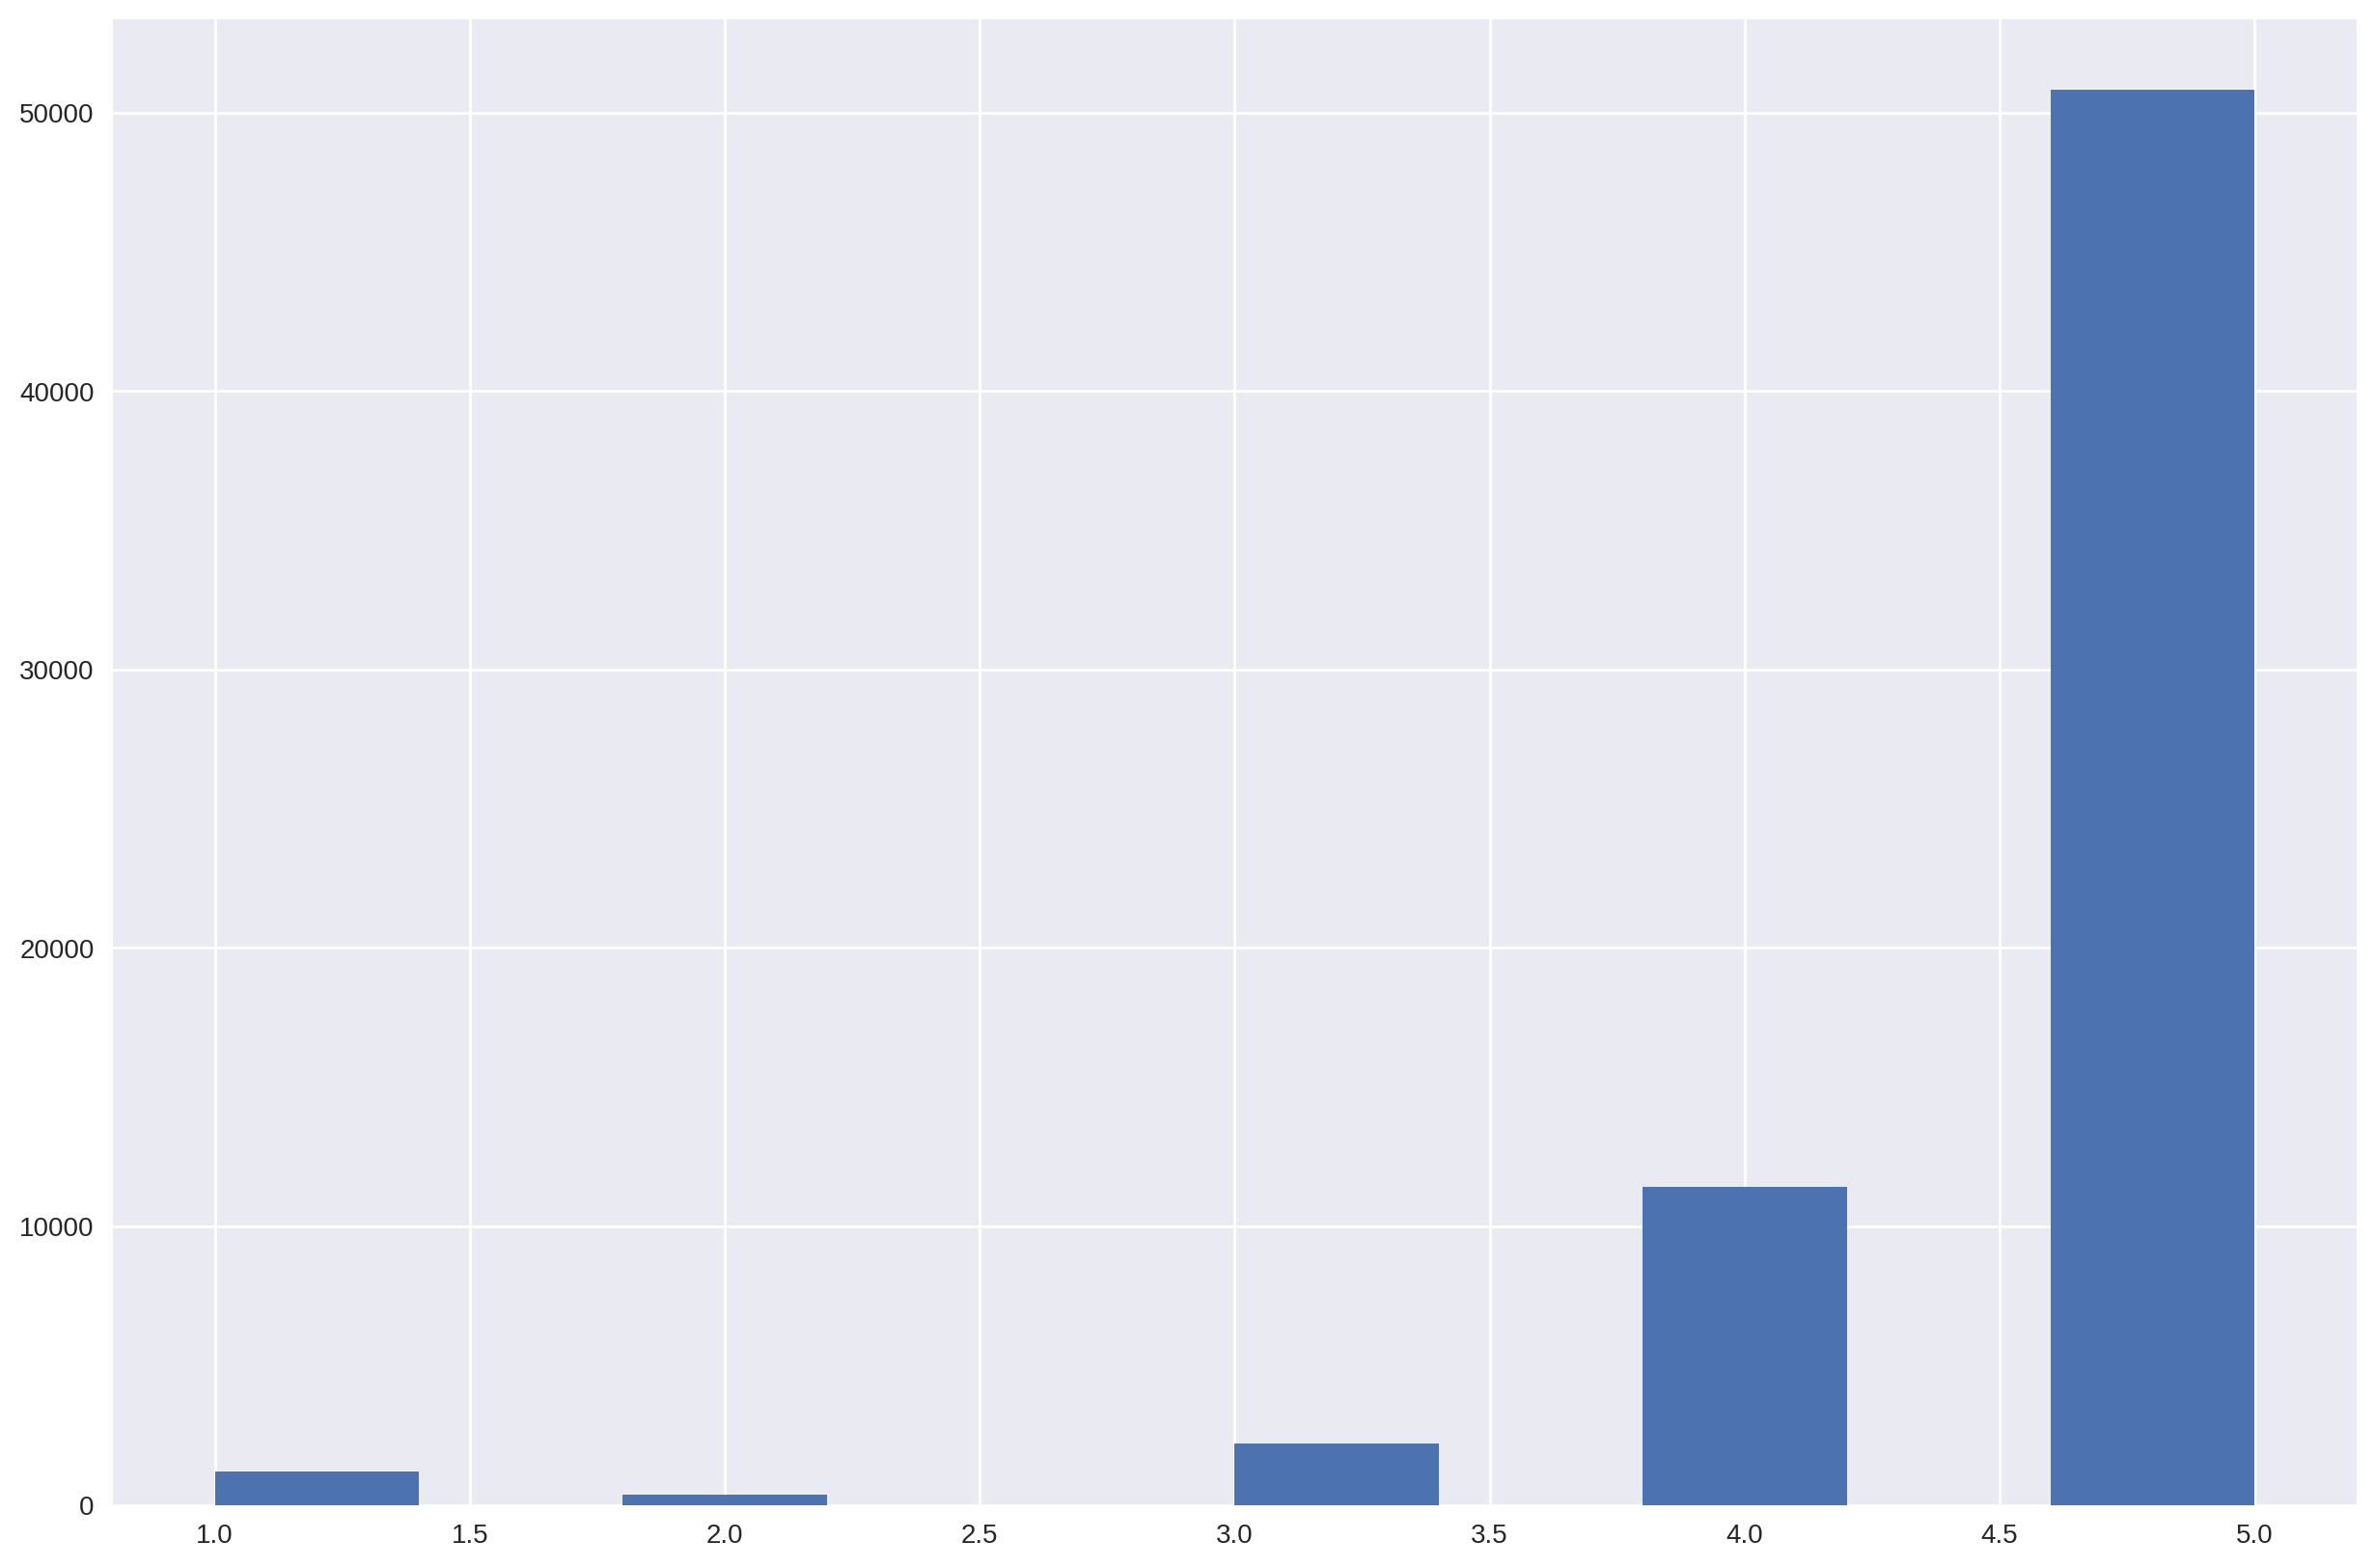

In [40]:
plt.hist(df_adarev_stopwords['score'])
plt.show()

SETELAH SEMUA YANG DILAKUKAN ANDA DAPAT MEMBUAT BERBAGAI ANALISIS SENTIMENT SEPERTI MENGELOMPOKKAN DALAM WAKTU TERTENTU ATAU VERSI DAN LAINNYA